In [ ]:
# Load General Libraries
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the dataset (no header)
dataset = pd.read_csv("creditcard.csv", header=0)

In [ ]:
dataset.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
67655,52640.0,-1.632593,-0.738180,1.353063,0.069565,-0.576522,-0.791783,-0.190157,0.539844,0.284841,...,0.462408,0.687753,0.347488,0.424673,-0.696771,0.276548,0.006250,-0.017085,160.65,0
52622,45562.0,1.217023,0.398130,0.557752,1.100887,-0.326051,-0.873724,0.177558,-0.223849,-0.085638,...,-0.216412,-0.602385,0.086800,0.358977,0.395140,-0.633954,0.028975,0.032671,9.99,0
242769,151641.0,1.947100,-0.536134,-0.372740,0.334170,-0.640427,-0.029513,-0.779584,0.178165,1.359513,...,0.218737,0.821130,0.079815,-0.418442,-0.123464,-0.202803,0.035166,-0.052365,9.99,0
226837,144819.0,1.906726,0.616255,-0.900046,3.497413,0.794825,0.306015,0.193451,0.009230,-1.466519,...,0.286304,0.787097,0.090734,0.703113,0.109355,0.080807,-0.049148,-0.054573,4.54,0
234869,148150.0,1.904826,-0.090252,-1.908173,0.076379,1.194980,1.132364,-0.188781,0.393152,0.283447,...,-0.243506,-0.540778,0.385863,-0.830695,-0.495374,0.269303,-0.016075,-0.054545,5.99,0


In [ ]:
# Determining how many transactions are fraudulent (Fraud = Class 1 and NonFraud = Class 0)
dataset.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:>

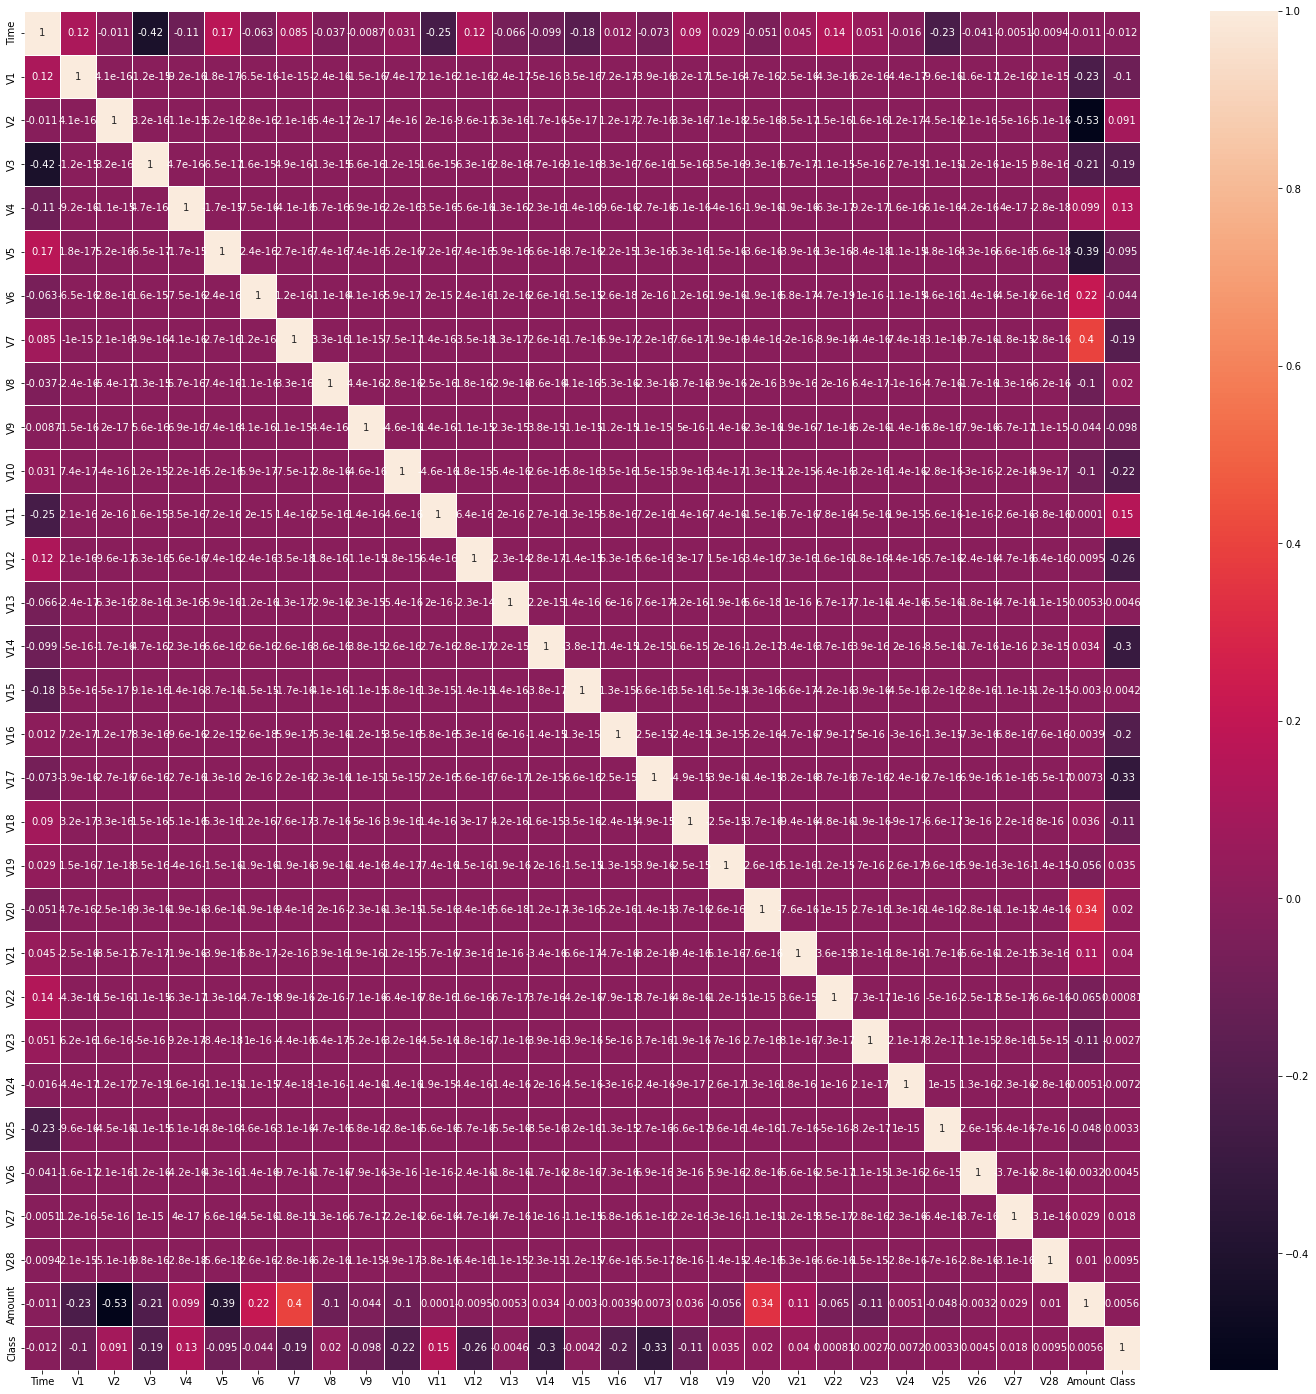

In [ ]:
# Creating Heat Map of Correlations between Features
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(dataset.corr(), annot=True, linewidths=1, ax=ax)

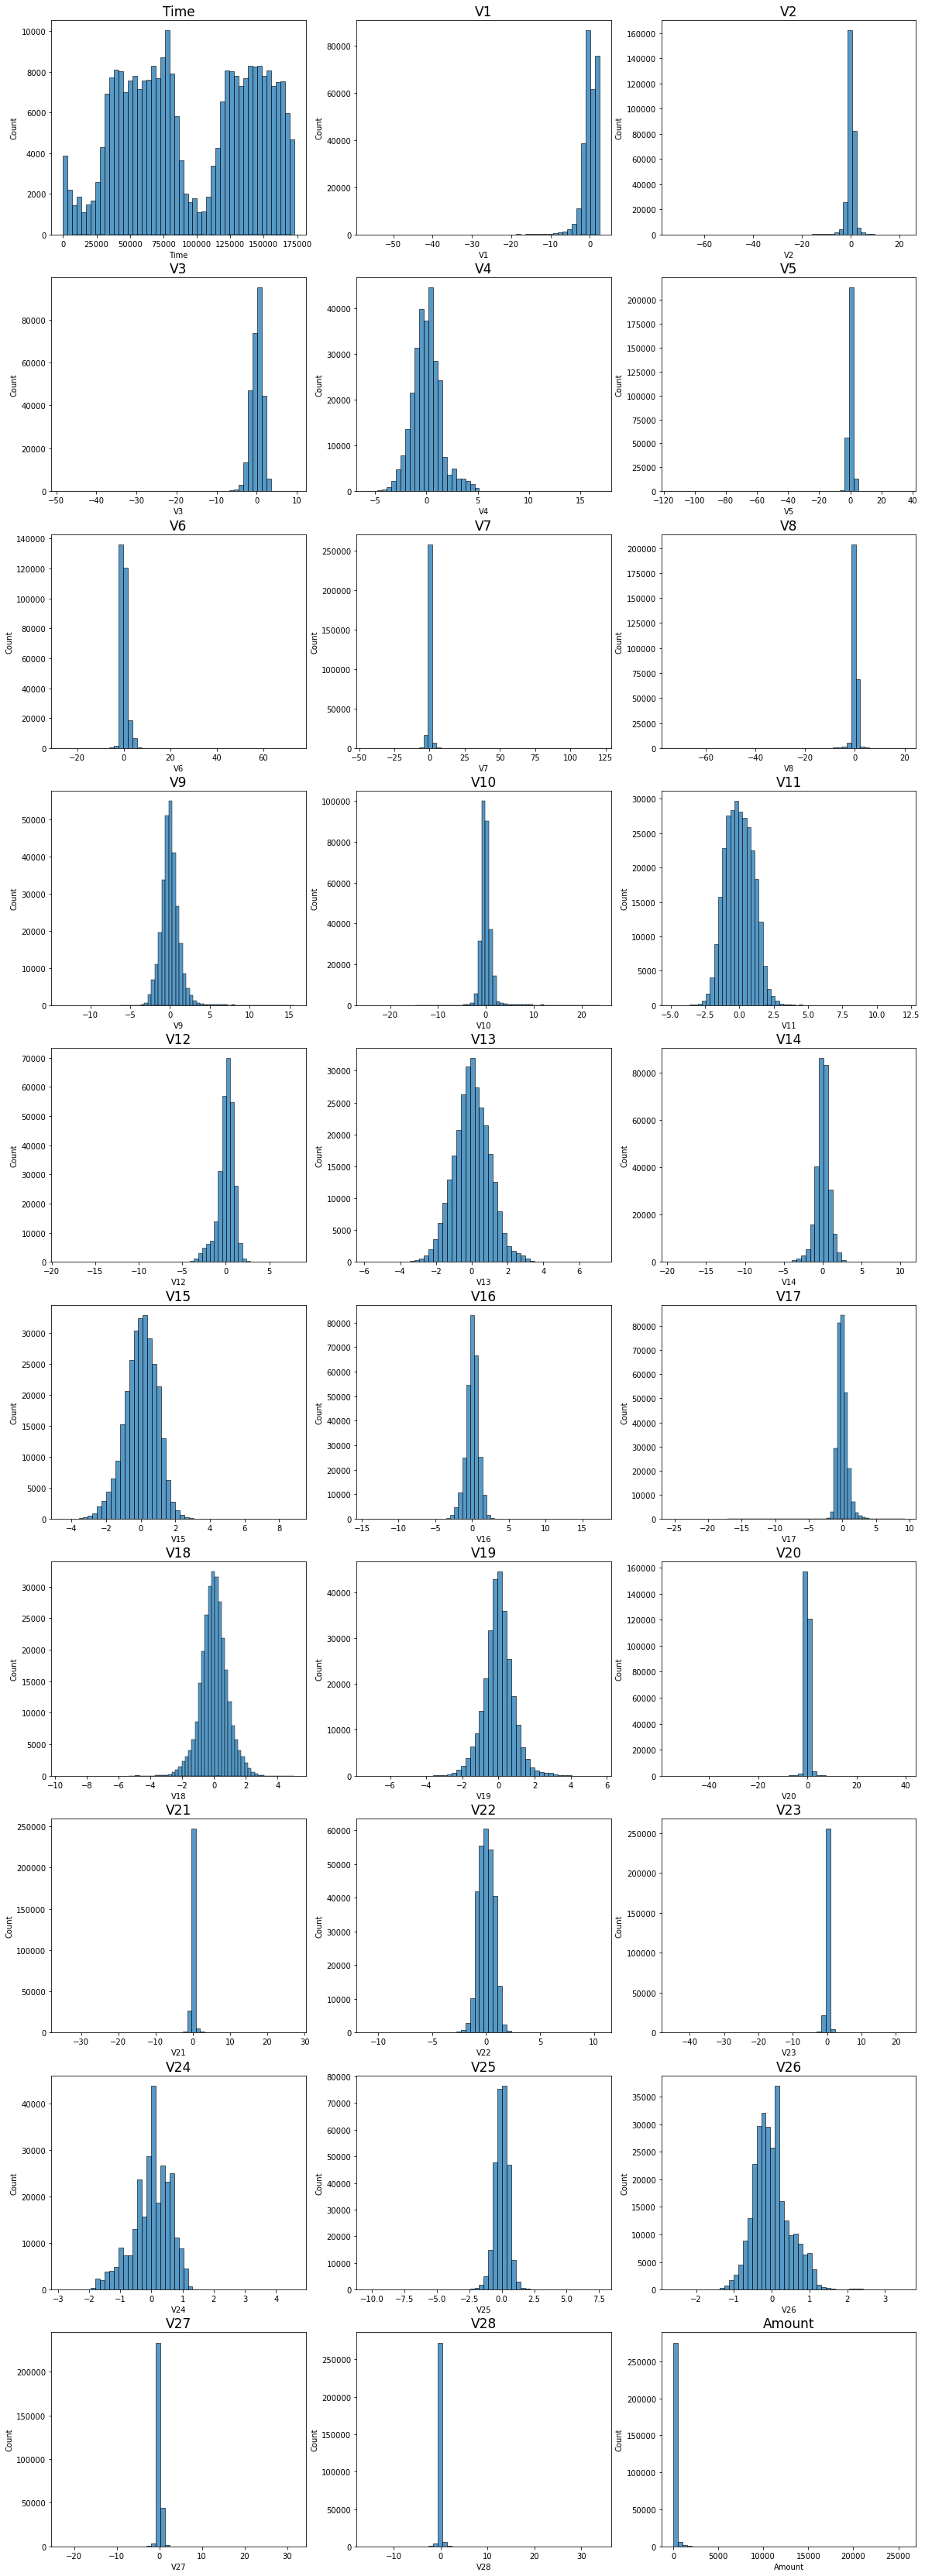

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
plt.figure(figsize=(20, 60))
for n, col in enumerate(dataset.drop('Class',axis=1).columns):
    plt.subplot(10,3,n+1)
    sns.histplot(dataset[col][dataset.Class == 1], bins=50)
    sns.histplot(dataset[col][dataset.Class == 0], bins=50)
    plt.title(col, fontsize=17)
plt.show()

In [ ]:
X = dataset.iloc[:, 0:30].values
y = dataset.iloc[:, -1].values

print(X)
print(y)

[[ 0.00000000e+00 -1.35980713e+00 -7.27811733e-02 ...  1.33558377e-01
  -2.10530535e-02  1.49620000e+02]
 [ 0.00000000e+00  1.19185711e+00  2.66150712e-01 ... -8.98309914e-03
   1.47241692e-02  2.69000000e+00]
 [ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00 ... -5.53527940e-02
  -5.97518406e-02  3.78660000e+02]
 ...
 [ 1.72788000e+05  1.91956501e+00 -3.01253846e-01 ...  4.45477214e-03
  -2.65608286e-02  6.78800000e+01]
 [ 1.72788000e+05 -2.40440050e-01  5.30482513e-01 ...  1.08820735e-01
   1.04532821e-01  1.00000000e+01]
 [ 1.72792000e+05 -5.33412522e-01 -1.89733337e-01 ... -2.41530880e-03
   1.36489143e-02  2.17000000e+02]]
[0 0 0 ... 0 0 0]


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = np.random)

print(X_train)
print(y_train)

[[ 1.31167000e+05  2.61506419e-02  3.18904000e-01 ...  1.57201405e-01
   4.44097711e-02  4.50000000e+01]
 [ 9.47730000e+04 -2.25167819e+00 -9.72004752e-01 ...  3.20266243e-01
  -4.19856778e-03  6.40000000e+01]
 [ 1.59219000e+05 -6.30080053e+00  5.57528900e+00 ... -7.59464509e-05
  -8.76308282e-02  1.09900000e+01]
 ...
 [ 5.73850000e+04 -4.51118440e+00 -6.79558836e-01 ...  6.50906951e-01
   3.91688067e-01  2.31930000e+02]
 [ 1.28601000e+05  8.56304477e-01 -2.22719113e+00 ... -2.99108230e-02
   6.19189022e-02  5.69800000e+02]
 [ 1.19157000e+05  1.98771539e+00 -2.36505346e-01 ... -8.20968035e-02
  -7.14415949e-02  9.99000000e+00]]
[0 0 0 ... 0 0 0]


# Logistic Regression using Confusion Matrix for Test Data

In [ ]:
# Import the class
from sklearn.linear_model import LogisticRegression

# Instantiating the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000)

# Fitting the model with data
logreg.fit(X_train, y_train)


# Predicting the labels on test set
y_pred_test = logreg.predict(X_test)

Confusion Matrix
 [[56853    11]
 [   36    62]]


CLassication metrices for test set
Accuracy: 0.9991748885221726
Precision: 0.8493150684931506
Recall(Sensitivity): 0.6326530612244898
F1 Score: 0.7251461988304094


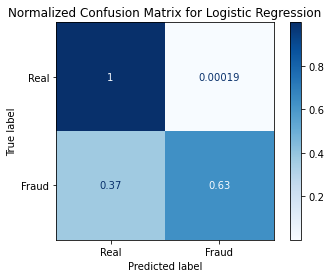

In [ ]:
# import the metrics class
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix\n', cnf_matrix)


plt_cnf_matrix = plot_confusion_matrix(logreg, X_test, y_test,
                                       display_labels=['Real','Fraud'],
                                       cmap=plt.cm.Blues,
                                       normalize='true')
plt_cnf_matrix.ax_.set_title('Normalized Confusion Matrix for Logistic Regression')

# Print Evaluation Metrics
print("\n")
print ("CLassication metrices for test set")
print("Accuracy:",accuracy_score(y_test, y_pred_test))
print("Precision:",precision_score(y_test, y_pred_test))
print("Recall(Sensitivity):",recall_score(y_test, y_pred_test))
print("F1 Score:",f1_score(y_test, y_pred_test))

# K-Nearest Neighbour

In [ ]:
# Some Functions for Showing the Classifier Performance
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

labels = ['Real','Fraud']
def classifier_performance(model,y_pred):
    print('Classification Report: \n', classification_report(y_test,y_pred,target_names=labels))
    # Plot normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized Confusion Matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(model, X_test, y_test,
                                     display_labels=labels,
                                     cmap=plt.cm.Blues,
                                     normalize='true')
        disp.ax_.set_title(title)
        print(title)
        print(disp.confusion_matrix)
    plt.show()
    return

In [ ]:
# Normalize Features
from sklearn import preprocessing
#print(X_train)
X_train_normalized = preprocessing.normalize(X_train)
#print(X_train_normalized)
X_test_normalized = preprocessing.normalize(X_test)

Classification Report: 
               precision    recall  f1-score   support

        Real       1.00      1.00      1.00     56864
       Fraud       0.84      0.68      0.75        98

    accuracy                           1.00     56962
   macro avg       0.92      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix, without normalization
[[9.99771384e-01 2.28615644e-04]
 [3.16326531e-01 6.83673469e-01]]
Normalized Confusion Matrix
[[9.99771384e-01 2.28615644e-04]
 [3.16326531e-01 6.83673469e-01]]


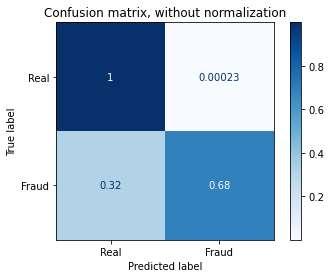

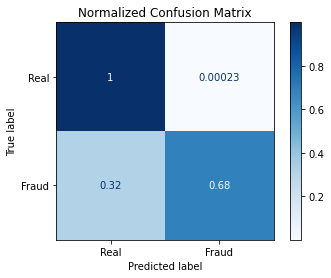

In [ ]:
# Import the class
from sklearn.neighbors import KNeighborsClassifier

# Instantiating the model (using the default parameters)
MODEL_KNN = KNeighborsClassifier(n_neighbors=1)

# Train the Model
MODEL_KNN.fit(X_train_normalized,y_train)

# Save the Trained Model
#pickle.dump(MODEL_KNN, open('Model_KNeighborsClassifier.pkl', 'wb'))

# Predict the Trained Model on our Test data
y_pred_KNN = MODEL_KNN.predict(X_test_normalized)

# Print the Classification Report and Confusion Matrix
classifier_performance(MODEL_KNN,y_pred_KNN)

In [ ]:
# Print Evaluation Metrics
print("KNN Accuracy:",accuracy_score(y_test, y_pred_KNN))
print("KNN Precision:",precision_score(y_test, y_pred_KNN))
print("KNN Recall:",recall_score(y_test, y_pred_KNN))
print("KNN F1 Score:",f1_score(y_test, y_pred_KNN))

KNN Accuracy: 0.9992275552122467
KNN Precision: 0.8375
KNN Recall: 0.6836734693877551
KNN F1 Score: 0.752808988764045


Text(0, 0.5, 'F1 Score')

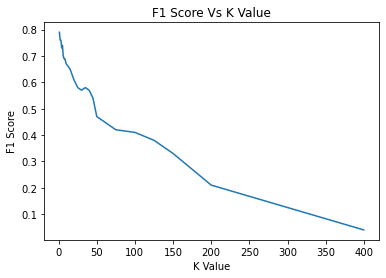

In [ ]:
KNN_X=[1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,75,100,125,150,200,400]
KNN_Y=[0.79,0.76,0.76,0.73,0.74,0.70,0.69,0.69,0.68,0.67,0.65,0.61,0.58,0.57,0.58,0.57,0.54,0.47,0.42,0.41,0.38,0.33,0.21,0.04]

plt.plot(KNN_X, KNN_Y)
plt.title('F1 Score Vs K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

## Gaussian Naive Bayes

Classification Report: 
               precision    recall  f1-score   support

        Real       1.00      0.99      1.00     56864
       Fraud       0.12      0.62      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.81      0.60     56962
weighted avg       1.00      0.99      0.99     56962

Confusion matrix, without normalization
[[0.99240293 0.00759707]
 [0.37755102 0.62244898]]
Normalized Confusion Matrix
[[0.99240293 0.00759707]
 [0.37755102 0.62244898]]


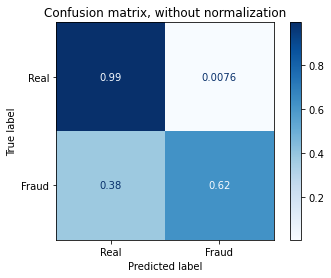

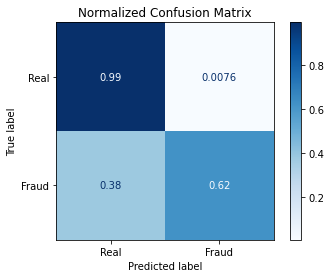

In [ ]:
# Import the class
from sklearn.naive_bayes import GaussianNB

# Instantiating the model (using the default parameters)
MODEL_GNB = GaussianNB()

# Train the Model
MODEL_GNB.fit(X_train,y_train)

# Save the Trained Model
pickle.dump(MODEL_GNB, open('Model_GaussianNB.pkl', 'wb'))

# Predict the Trained Model on our Test data
y_pred_GNB = MODEL_GNB.predict(X_test)

# Print the Classification Report and Confusion Matrix
classifier_performance(MODEL_GNB,y_pred_GNB)

In [ ]:
# Print Evaluation Metrics
print("GNB Accuracy:",accuracy_score(y_test, y_pred_GNB))
print("GNB Precision:",precision_score(y_test, y_pred_GNB))
print("GNB Recall:",recall_score(y_test, y_pred_GNB))
print("GNB F1 Score:",f1_score(y_test, y_pred_GNB))

GNB Accuracy: 0.9917664407850848
GNB Precision: 0.12373225152129817
GNB Recall: 0.6224489795918368
GNB F1 Score: 0.20642978003384094


## Decision Tree

Classification Report: 
               precision    recall  f1-score   support

        Real       1.00      1.00      1.00     56864
       Fraud       0.74      0.63      0.68        98

    accuracy                           1.00     56962
   macro avg       0.87      0.82      0.84     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix, without normalization
[[9.99613112e-01 3.86888014e-04]
 [3.67346939e-01 6.32653061e-01]]
Normalized Confusion Matrix
[[9.99613112e-01 3.86888014e-04]
 [3.67346939e-01 6.32653061e-01]]


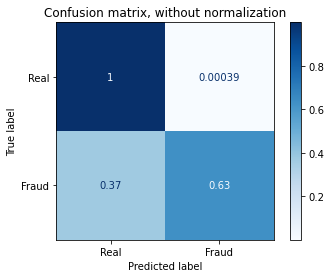

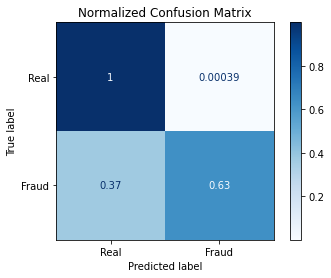

In [ ]:
# Import the class
from sklearn.tree import DecisionTreeClassifier

# Instantiating the model (using the default parameters)
MODEL_DT = DecisionTreeClassifier()

# Train the Model
MODEL_DT.fit(X_train,y_train)

# Save the Trained Model
pickle.dump(MODEL_DT, open('DecisionTreeClassifier.pkl', 'wb'))

# Predict the Trained Model on our Test data
y_pred_DT = MODEL_DT.predict(X_test)

# Print the Classification Report and Confusion Matrix
classifier_performance(MODEL_DT,y_pred_DT)

In [ ]:
# Print Evaluation Metrics
print("DT Accuracy:",accuracy_score(y_test, y_pred_DT))
print("DT Precision:",precision_score(y_test, y_pred_DT))
print("DT Recall:",recall_score(y_test, y_pred_DT))
print("DT F1 Score:",f1_score(y_test, y_pred_DT))

DT Accuracy: 0.9989817773252344
DT Precision: 0.7380952380952381
DT Recall: 0.6326530612244898
DT F1 Score: 0.6813186813186813


## Support Vector Machine

C:\Users\tearr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tearr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tearr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report: 
               precision    recall  f1-score   support

        Real       1.00      1.00      1.00     56864
       Fraud       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix, without normalization
[[1. 0.]
 [1. 0.]]
Normalized Confusion Matrix
[[1. 0.]
 [1. 0.]]


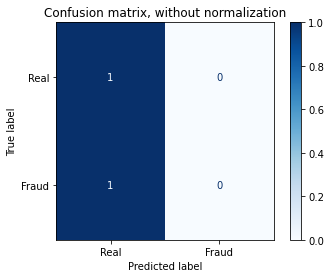

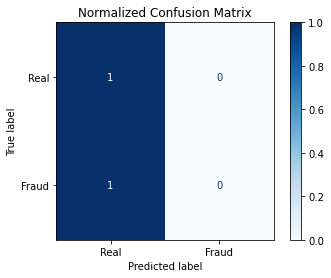

In [ ]:
# Import the class
from sklearn.svm import SVC

# Instantiating the model (using the default parameters)
MODEL_SVM = SVC()

# Train the Model
MODEL_SVM.fit(X_train,y_train)

# Save the Trained Model
pickle.dump(MODEL_SVM, open('Model_SupportVectorClasifier.pkl', 'wb'))

# Predict the Trained Model on our Test data
y_pred_SVM = MODEL_SVM.predict(X_test)

# Print the Classification Report and Confusion Matrix
classifier_performance(MODEL_SVM,y_pred_SVM)

In [ ]:
# Print Evaluation Metrics
print("SVM Accuracy:",accuracy_score(y_test, y_pred_SVM))
print("SVM Precision:",precision_score(y_test, y_pred_SVM))
print("SVM Recall:",recall_score(y_test, y_pred_SVM))
print("SVM F1 Score:",f1_score(y_test, y_pred_SVM))

SVM Accuracy: 0.9982795547909132
SVM Precision: 0.0
SVM Recall: 0.0
SVM F1 Score: 0.0


C:\Users\tearr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Analysis

Text(0.5, 1.0, 'Accuracy Comparison')

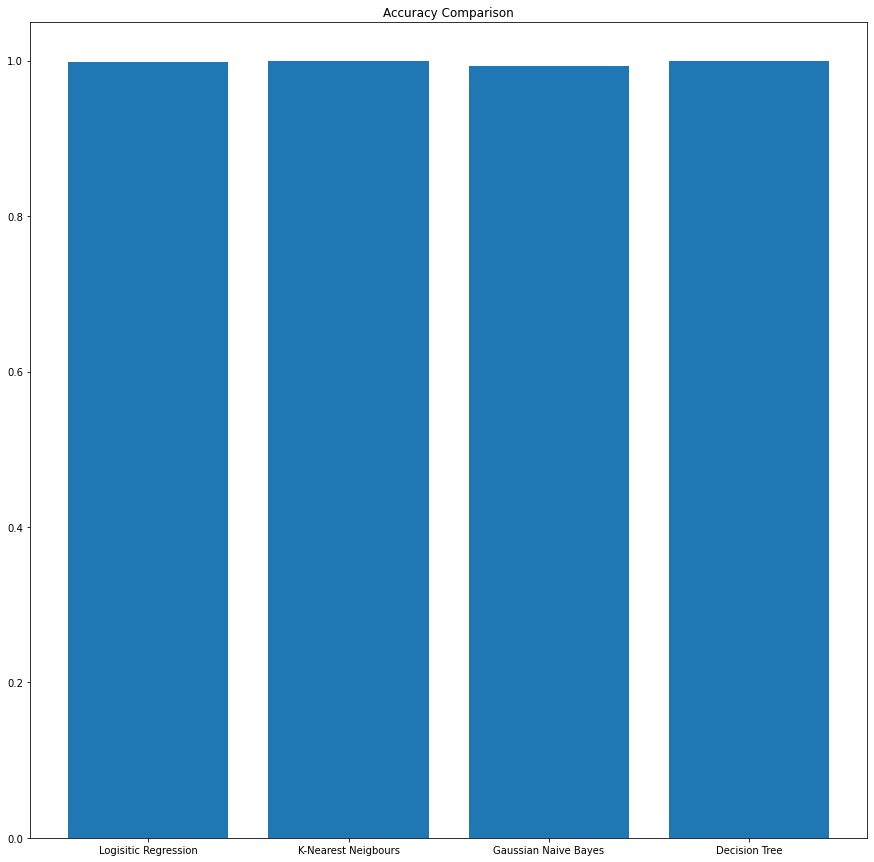

In [ ]:
# Bar Charts (Comparison of accuracy scores)
names = ['Logisitic Regression', 'K-Nearest Neigbours', 'Gaussian Naive Bayes', 'Decision Tree']
values = [0.9987711105649381,0.9992977774656788,0.9932059969804431,0.9992802219023208]

plt.figure(figsize=(15, 15))
plt.bar(names, values)
plt.title('Accuracy Comparison')

Text(0.5, 1.0, 'Precision Comparison')

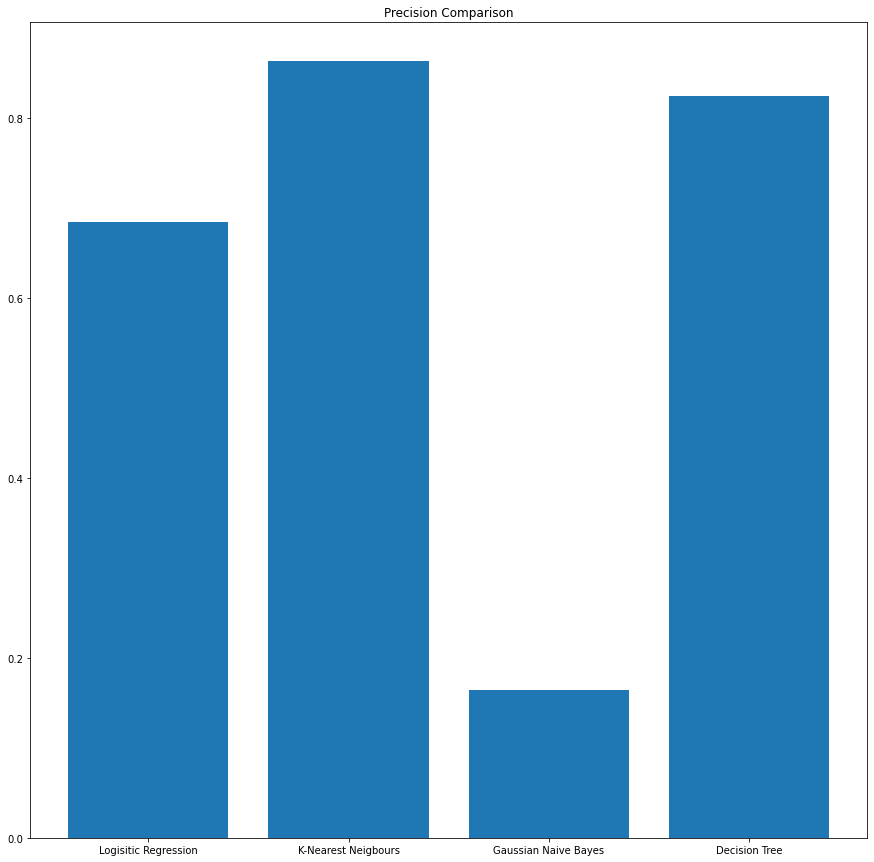

In [ ]:
# Bar Charts (Comparison of precision scores)
names = ['Logisitic Regression', 'K-Nearest Neigbours', 'Gaussian Naive Bayes', 'Decision Tree']
values = [0.6847826086956522,0.8636363636363636,0.16389548693586697,0.8247422680412371]

plt.figure(figsize=(15, 15))
plt.bar(names, values)
plt.title('Precision Comparison')

Text(0.5, 1.0, 'Recall Comparison')

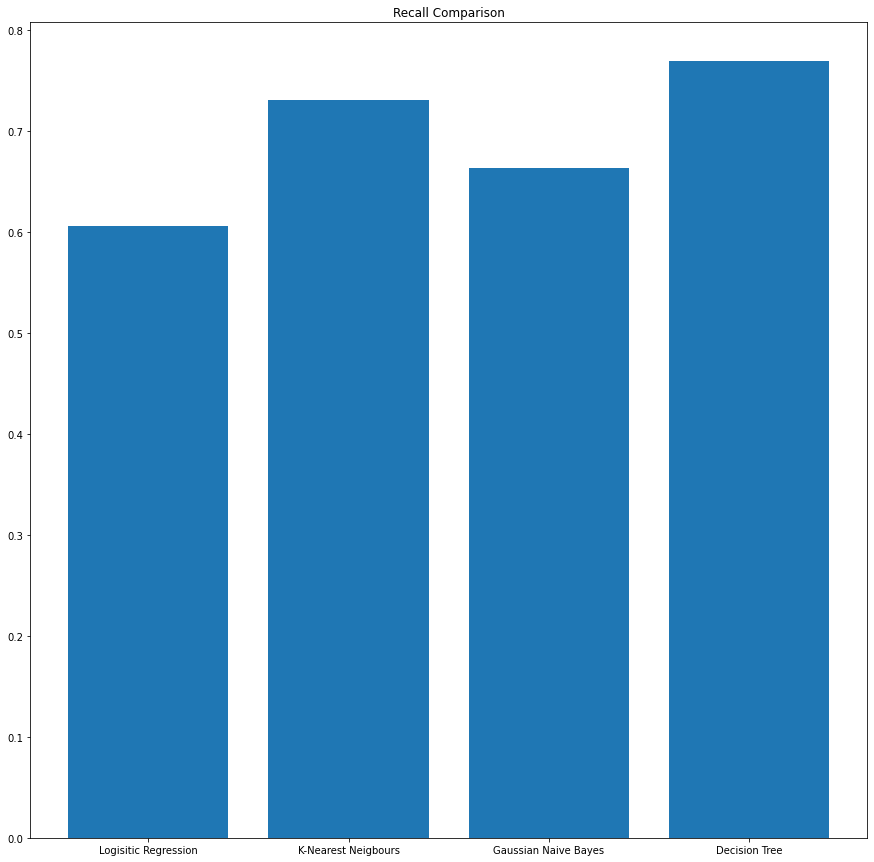

In [ ]:
# Bar Charts (Comparison of recall scores)
names = ['Logisitic Regression', 'K-Nearest Neigbours', 'Gaussian Naive Bayes', 'Decision Tree']
values = [0.6057692307692307,0.7307692307692307,0.6634615384615384,0.7692307692307693]

plt.figure(figsize=(15, 15))
plt.bar(names, values)
plt.title('Recall Comparison')

Text(0.5, 1.0, 'F1 Comparison')

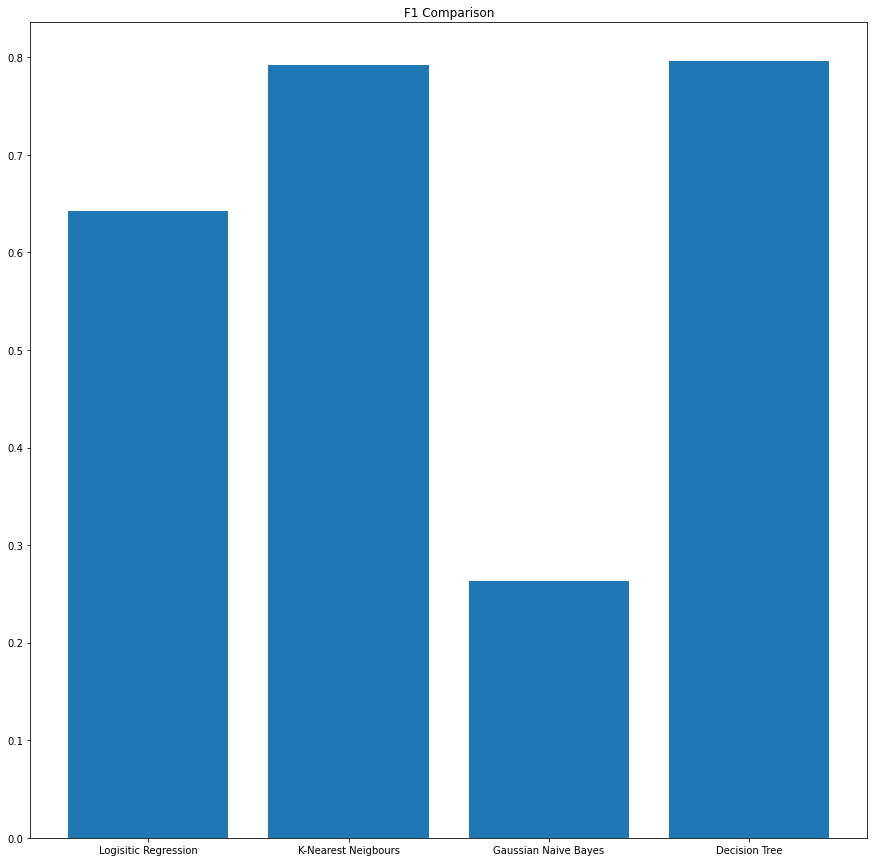

In [ ]:
# Bar Charts (Comparison of F1 scores)
names = ['Logisitic Regression', 'K-Nearest Neigbours', 'Gaussian Naive Bayes', 'Decision Tree']
values = [0.6428571428571429,0.7916666666666666,0.26285714285714284,0.7960199004975124]

plt.figure(figsize=(15, 15))
plt.bar(names, values)
plt.title('F1 Comparison')